In [50]:
import datetime

import numpy as np
import pandas as pd
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
from matplotlib.finance import quotes_historical_yahoo_ochl
%matplotlib inline
from hmmlearn import hmm 
from sklearn.preprocessing import scale
import tushare as ts

In [133]:
df = pd.read_csv('IBM_exp.csv', sep=',')


open_v = df.Open.values
Dates = df.Date.values # 日期列
close_v = df.Close.values # 收盘价
volume = df.Volume.values # 交易数
high = df.High.values # 最高价格
low = df.Low.values # 最低价格

In [134]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,194.089996,196.350006,193.800003,196.350006,167.219650,4234100
1,2013-01-03,195.669998,196.289993,194.440002,195.270004,166.299850,3644700
2,2013-01-04,194.190002,194.460007,192.779999,193.990005,165.209763,3380200
3,2013-01-07,193.399994,193.779999,192.339996,193.139999,164.485886,2862300
4,2013-01-08,192.919998,193.300003,191.600006,192.869995,164.255936,3026900


In [135]:
diff = np.diff(close_v)[4:]
volume_5 = np.log(volume[5:]) - np.log(volume[:-5])
close_5 = np.log(close_v[5:]) - np.log(close_v[:-5])
logDel = np.log(high[5:]) - np.log(low[5:])
dates = pd.to_datetime(Dates[5:])
close = close_v[5:]

* spherical：是指在每个马尔可夫隐含状态下，可观察态向量的所有特性分量使用相同的方差值。对应协方差矩阵的非对角为0，对角值相等，即球面特性。这是最简单的高斯分布PDF。
* diag：是指在每个马尔可夫隐含状态下，可观察态向量使用对角协方差矩阵。对应协方差矩阵非对角为0，对角值不相等。diag是hmmlearn里面的默认类型。
* full：是指在每个马尔可夫隐含状态下，可观察态向量使用完全协方差矩阵。对应的协方差矩阵里面的元素都是不为零。
* tied：是指所有的马尔可夫隐含状态使用相同的完全协方差矩阵。

In [136]:
# scale归一化处理：均值为0和方差为1
# 将价格和交易数组成输入数据
X = np.column_stack([volume_5, close_5, logDel])
#X = np.column_stack([close_v, volume, high, low, open_v])
# 训练高斯HMM模型，这里假设隐藏状态4个
model = hmm.GaussianHMM(3, covariance_type = "full", n_iter = 300)
model.fit(X)

# 预测隐状态
hidden_states = model.predict(X)

/Users/skyler/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/skyler/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/skyler/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/skyler/anaconda3/lib/python3.6/site-pac

In [139]:
model.monitor_.converged

True

In [141]:
%matplotlib inline

/Users/skyler/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


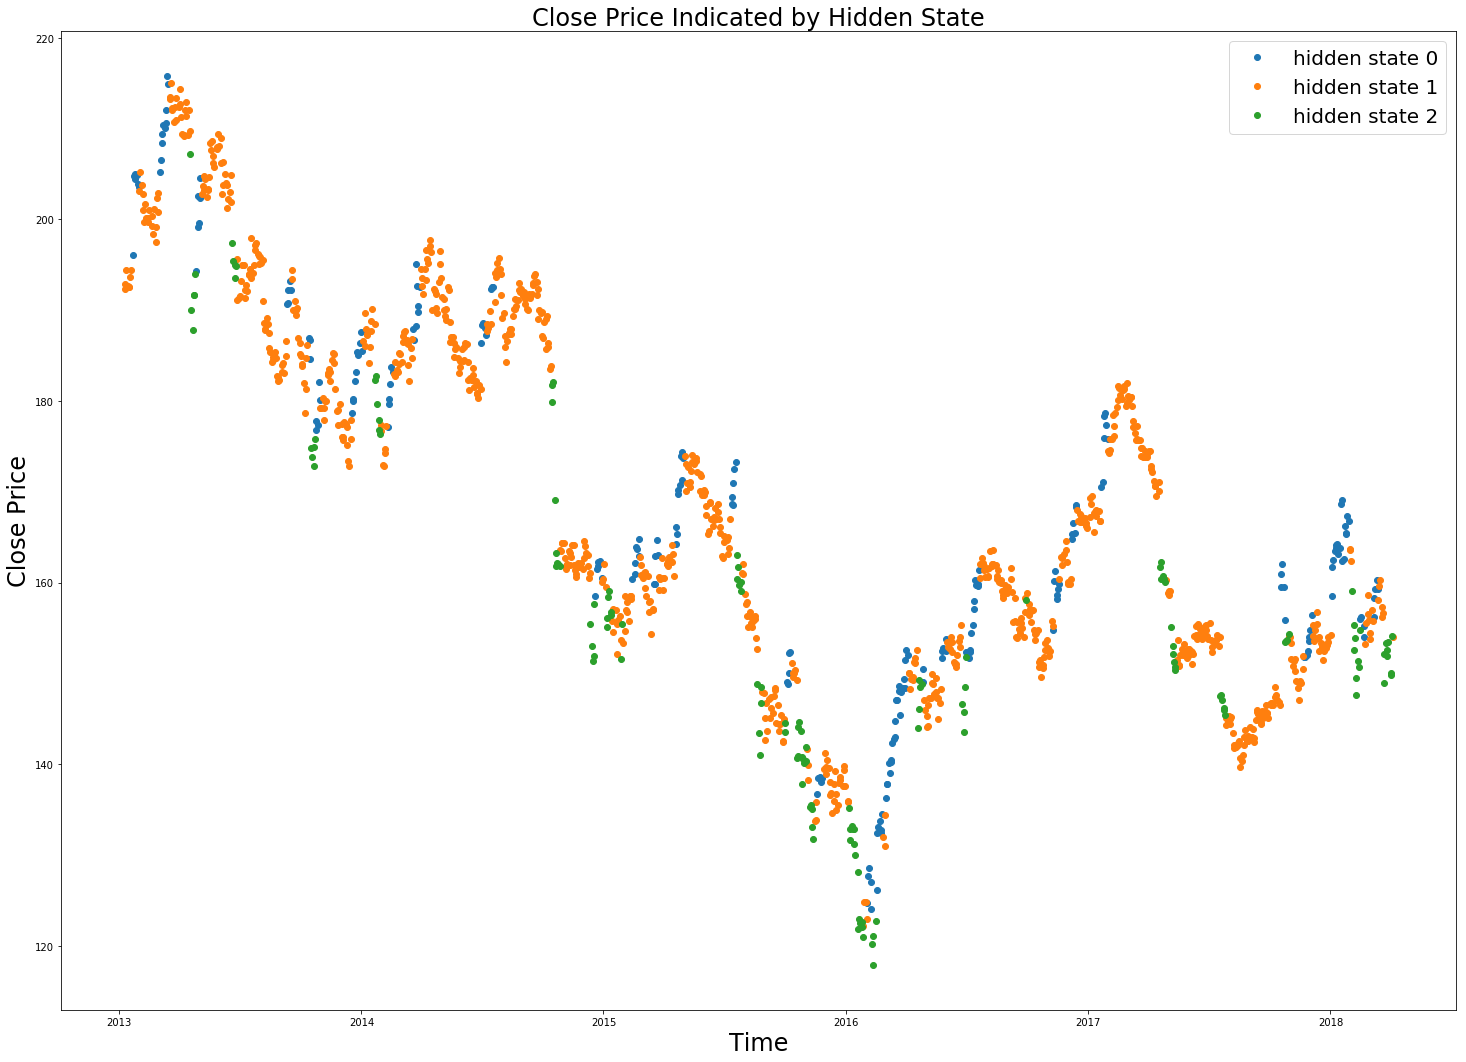

In [153]:
plt.figure(figsize=(25, 18)) 
plt.xlabel('Time',fontsize=24)
plt.ylabel('Close Price', fontsize=24)
plt.title('Close Price Indicated by Hidden State', fontsize=24)
for i in range(model.n_components):
    pos = (hidden_states == i)
    plt.plot_date(dates[pos], close[pos], 'o', label='hidden state %d'%i, lw=2)
    plt.legend(loc="left", prop={'size': 20})

plt.savefig('state.png',dpi=600)


In [143]:
print("Transition matrix")
print(model.transmat_)
print("")

print("means and vars of each hidden state")
for i in range(model.n_components):
    print("%dth hidden state" % i)
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print("")

Transition matrix
[[ 0.8312346   0.14813621  0.02062919]
 [ 0.03380614  0.94069566  0.02549821]
 [ 0.0634369   0.12721786  0.80934524]]

means and vars of each hidden state
0th hidden state
mean =  [ 0.01454256  0.03148054  0.01534563]
var =  [  3.85368454e-01   4.49751693e-04   9.15752937e-05]

1th hidden state
mean =  [-0.03499698 -0.00263041  0.01196123]
var =  [  1.63043932e-01   2.10822870e-04   3.12925926e-05]

2th hidden state
mean =  [ 0.1995593  -0.04260243  0.01991086]
var =  [  5.30933075e-01   8.69108311e-04   1.66263581e-04]



/Users/skyler/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


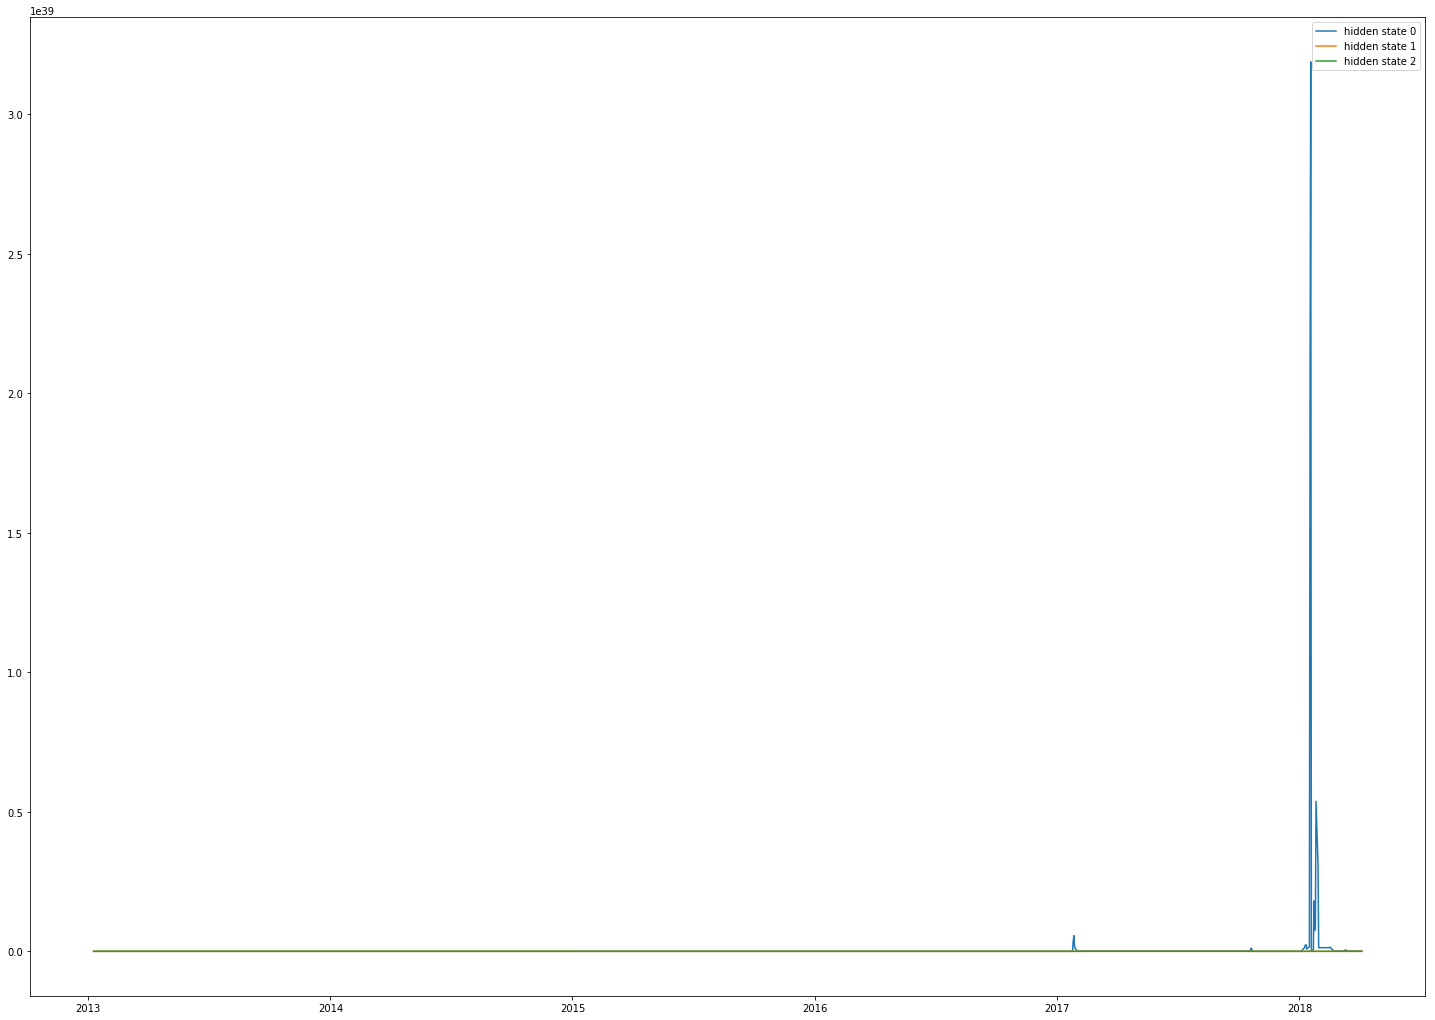

In [154]:
res = pd.DataFrame({'Date':dates,'logRet_1':diff,'state':hidden_states}).set_index('Date')
plt.figure(figsize=(25, 18)) 
for i in range(model.n_components):
    pos = (hidden_states==i)
    pos = np.append(0,pos[:-1])#第二天进行买入操作
    df = res.logRet_1
    res['state_ret%s'%i] = df.multiply(pos)
    plt.plot_date(dates,np.exp(res['state_ret%s'%i].cumsum()),'-',label='hidden state %d'%i)
    plt.legend(loc="left")